# Regular Genomics Project **RNA Localisation**


In [7]:
from keras.optimizers import Nadam
from keras.losses import KLDivergence, CategoricalCrossentropy
from plotting import plot_line_graph, multiplot_pearson
from utils import prepare_data, set_variables
from metrics import pearson, Pearson
from models import CNN
from plotting import box_plot
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [8]:
train_data, valid_data, test_data = prepare_data(colab=False, path= "~/Downloads/seq_from_prim_and_icshape_withchrm_no_scaff.csv")  # Set colab = True for colab


### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [9]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = "CNN_Baseline_4Conv_Struct_ext3" # "steve_CNN_Att10" #'CNN_architecture7'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)


Add c
Add p
Add f
Add e


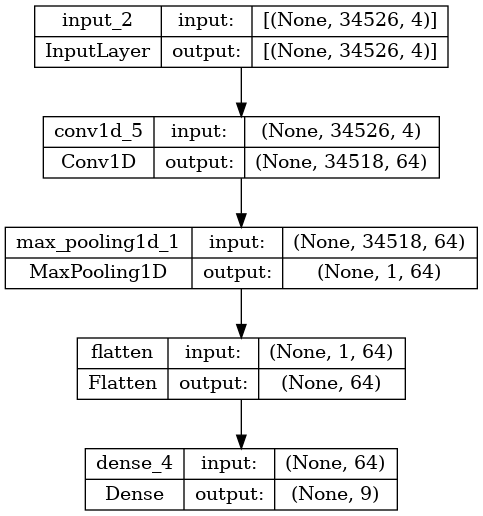

In [10]:

from keras import backend as K
import tensorflow as tf
def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)
    return 1 - K.square(r)


model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            optimizer=Nadam(),
            #loss=correlation_coefficient_loss, #KLDivergence(),
            metrics=[pearson, Pearson(name="class_pearson", return_dict=True),  Pearson(name="class_nodict_pearson", return_dict=False), KLDivergence(name="kullback_leibler_divergence"), "accuracy"],
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 34526, 4)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 34526, 64)    320         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 34526, 64)    45120       ['conv1d[0][0]']                 
                                                                                                  
 conv1d_2 (Conv1D)              (None, 34526, 64)    45120       ['conv1d_1[0][0]']               
                                                                                              

In [11]:
checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

callbacks=[model_checkpoint_callback, EarlyStopping(monitor='val_loss', patience=10)]

history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train, callback=callbacks)

False
False
Epoch 1/3


2023-07-12 20:56:38.552475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 10/311 [..............................] - ETA: 2:00 - loss: 2.2219 - pearson: -0.0042 - ERM: 0.0971 - KDEL: -0.1061 - LMA: -0.0508 - MITO: 0.0068 - NES: -0.0577 - NIK: 0.0106 - NLS: -0.0729 - NUCP: 0.1500 - OMM: -0.0145 - class_nodict_pearson: -0.0015 - kullback_leibler_divergence: 0.2368 - accuracy: 0.1562

KeyboardInterrupt: 

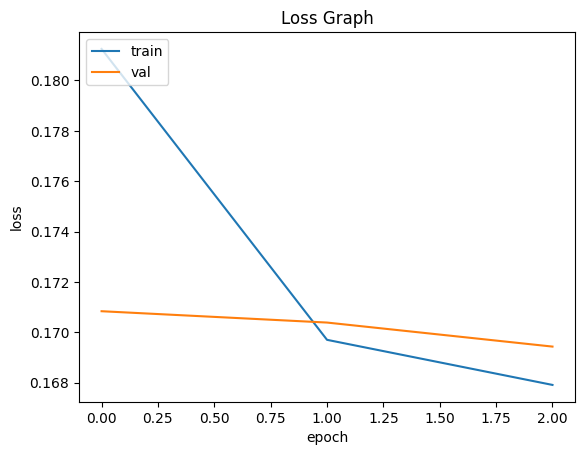

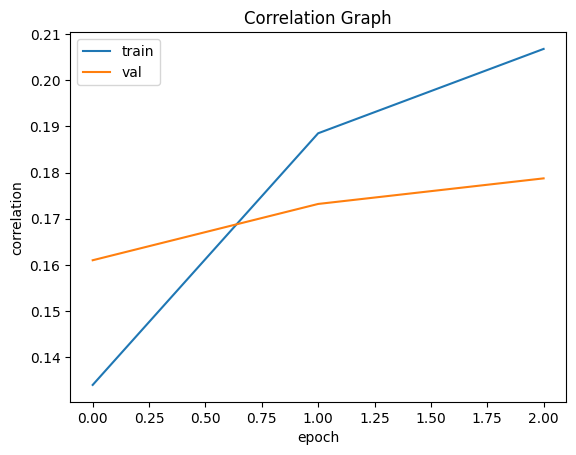

In [ ]:
a = model.summary()
print(a)

param_dataLoader_valid = {
    'padding_length': max_seq_len,
    'batch_size': 32,
    'shuffle': False,
    'struct': True
}

pred = model.predict(valid_data, param_dataLoader_valid)
print(valid_data.iloc[2, :])
print(pred[2])
print(valid_data.iloc[20, :])
print(pred[20])
print(valid_data.iloc[200, :])
print(pred[200])
print(valid_data.iloc[499, :])
print(pred[499])
pred = model.predict(train_data, param_dataLoader_valid)
print(train_data.iloc[2, :])
print(pred[2])
print(train_data.iloc[20, :])
print(pred[20])
print(train_data.iloc[200, :])
print(pred[200])
print(train_data.iloc[499, :])
print(pred[499])

plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

plt_data = [history.history['pearson'], history.history['val_pearson']]
plot_line_graph(plt_data, "Correlation Graph", 'correlation', 'epoch', ['train', 'val'])


#plt_data = [history.history['class_pearson'], history.history['val_class_pearson']]
#plot_line_graph(plt_data, "class_pearson Graph", 'class_pearson', 'epoch', ['train', 'val'])

plt_data = [history.history['class_nodict_pearson'], history.history['val_class_nodict_pearson']]
plot_line_graph(plt_data, "class_nodict_pearson Graph", 'class_nodict_pearson', 'epoch', ['train', 'val'])


plt_data = [history.history['accuracy'], history.history['val_accuracy']]
plot_line_graph(plt_data, "accuracy Graph", 'accuracy', 'epoch', ['train', 'val'])

plt_data = [history.history['kullback_leibler_divergence'], history.history['val_kullback_leibler_divergence']]
plot_line_graph(plt_data, "kullback_leibler_divergence Graph", 'kullback_leibler_divergence', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

box_plot(train_data)

In [ ]:
model.print_model(model_architecture_path)
model.save_model(model_output_path)

In [12]:
import numpy as np
from tensorflow import keras
from motif_search.motif_utilities import plot_weights
path = "/home/steve/Documents/main_storage/resource_data/tep/steve_CNN_Att10_2023-07-10.h5"

In [ ]:
model.model.load_weights(path)

ValueError: Layer count mismatch when loading weights from file. Model expected 8 layers, found 0 saved layers.

In [13]:
a = model.summary()
print(a)

param_dataLoader_valid = {
    'padding_length': max_seq_len,
    'batch_size': 32,
    'shuffle': False,
    'struct': False
}

pred = model.predict(valid_data, param_dataLoader_valid)
print(valid_data.iloc[2, :])


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d_5 (Conv1D)           (None, 34518, 64)         2368      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 9)                 585       
                                                                 
Total params: 2,953
Trainable params: 2,953
Non-trainable params: 0
_________________________________________________________

2023-07-12 20:57:02.513617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


52/78 [===================>..........] - ETA: 2s

KeyboardInterrupt: 

In [ ]:
conv_layer = model.model.get_layer('conv1d_5')  # Replace 'conv1d' with the actual name of your convolutional layer
weights = conv_layer.get_weights()[0]
print(str(weights))

[[[-0.04378837 -0.03633479 -0.04170978 ...  0.06410637  0.04493919
    0.00463255]
  [-0.01040002  0.02271343  0.0595894  ...  0.01432562  0.02237537
    0.05105522]
  [ 0.05105216  0.05971216  0.0295601  ... -0.00529902 -0.06154494
   -0.0376615 ]
  ...
  [ 0.03604409  0.02584413 -0.02736477 ... -0.04739613 -0.00572461
    0.0054944 ]
  [ 0.04386922 -0.05856302 -0.04627424 ...  0.04589175 -0.03746348
    0.03041508]
  [-0.02401015 -0.03701241  0.02943955 ... -0.03613451  0.05807178
   -0.06352187]]

 [[ 0.04860113  0.06220869  0.06120138 ...  0.0025776   0.05485401
   -0.05427598]
  [ 0.05309518  0.0401394   0.03305894 ... -0.06099782  0.02692917
    0.04793009]
  [ 0.0414738   0.00788392 -0.04308609 ...  0.00602009 -0.0411213
    0.0166363 ]
  ...
  [-0.03971406 -0.00942796  0.02052806 ... -0.06075077  0.01244568
   -0.0516369 ]
  [ 0.04069036 -0.04666029  0.00030065 ...  0.05510759 -0.02349513
    0.0618036 ]
  [-0.05785304  0.05543165 -0.05671472 ...  0.02126136 -0.05422134
   -0.0

(11, 64, 64)
[[-4.37883735e-02 -1.04000233e-02  5.10521568e-02 -4.32762280e-02
   4.57001999e-02  1.06864944e-02  4.81514595e-02 -5.04789688e-02
   4.30274196e-02  3.63909900e-02 -6.49099946e-02  5.06995879e-02
   3.82493064e-02 -1.04327099e-02  2.82102767e-02  3.18878144e-02
  -5.74823283e-02  3.48589569e-03  5.04323356e-02  2.49870494e-02
   1.87132210e-02  4.88409027e-02 -6.03132583e-02  3.36454287e-02
   2.32802983e-02  3.28484271e-03  6.35289624e-02  2.23879633e-03
  -2.30362229e-02  6.49663359e-02 -3.81607525e-02  4.65643518e-02
  -1.19505939e-03 -1.22602321e-02  3.45325023e-02 -3.85579541e-02
   2.57701427e-02 -5.47240078e-02  3.52300555e-02 -4.78363931e-02
   3.02488711e-02  1.55418562e-02 -3.68319228e-02  2.09886432e-02
  -4.35497947e-02 -5.12392959e-03  2.93685850e-02  6.41270056e-02
   3.96527238e-02  1.73372198e-02 -2.68850327e-02 -4.09726426e-02
  -4.54732068e-02  6.09977767e-02  8.25515483e-03 -6.41283114e-04
  -2.84783840e-02  4.61929701e-02  5.55104390e-02  2.99600605e-

AssertionError: 

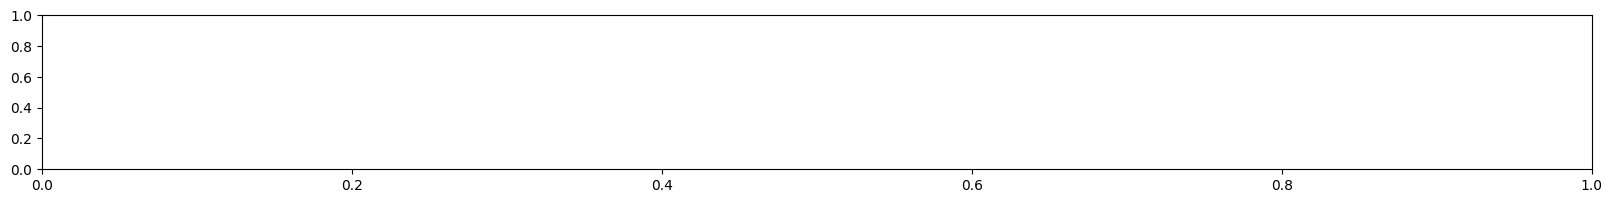

In [ ]:
print(weights.shape) #channels * input * kernel_size

# tensorflow(kernel_size, input_shape, n_filters)
for i in range(64): #weights.shape[2]
  
  w = np.array(weights[:,:,i]) #having np.array is important!
  print(str(w))
  plot_weights(w)